## Preprocessing

In [93]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

In [94]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [95]:
df = pd.read_csv('./data/final/01_phylum_dedornot_ra.csv')

In [96]:
df.head()

,Index,Patient=1,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,...,Bacteria;Synergistetes,Bacteria;Tenericutes,Bacteria;Thermotogae,Bacteria;Verrucomicrobia,Gender 1=F,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.000000,0.000000,0.0,0.076111,0.0,0.059049,0.0,0.0,...,0.0,0.0,0.0,0.00000,1,65,0,0,NaN,NaN
1,P2,1,0.000000,0.000000,0.0,0.633781,0.0,0.008703,0.0,0.0,...,0.0,0.0,0.0,0.00000,1,67,0,0,31.25,17.0
2,P3,1,0.000233,0.007146,0.0,0.083282,0.0,0.065788,0.0,0.0,...,0.0,0.0,0.0,0.01888,1,33,0,0,33.30,16.0
3,P4,1,0.000000,0.000000,0.0,0.163522,0.0,0.013764,0.0,0.0,...,0.0,0.0,0.0,0.00000,1,66,0,0,93.75,21.0
4,P5,1,0.000164,0.000000,0.0,0.225815,0.0,0.035394,0.0,0.0,...,0.0,0.0,0.0,0.00000,0,69,0,0,6.25,7.0


In [97]:
df.iloc[:,2:27]

,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,Bacteria;Cyanobacteria,Bacteria;Deinococcus-Thermus,...,Bacteria;NA,Bacteria;Nitrospirae,Bacteria;Parcubacteria,Bacteria;Proteobacteria,Bacteria;Saccharibacteria,Bacteria;Spirochaetae,Bacteria;Synergistetes,Bacteria;Tenericutes,Bacteria;Thermotogae,Bacteria;Verrucomicrobia
0,0.000000,0.000000,0.0,0.076111,0.0,0.059049,0.0,0.0,0.010153,0.015403,...,0.0,0.0,0.0,0.464638,0.0,0.000000,0.0,0.0,0.0,0.00000
1,0.000000,0.000000,0.0,0.633781,0.0,0.008703,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.132169,0.0,0.000000,0.0,0.0,0.0,0.00000
2,0.000233,0.007146,0.0,0.083282,0.0,0.065788,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.349757,0.0,0.000000,0.0,0.0,0.0,0.01888
3,0.000000,0.000000,0.0,0.163522,0.0,0.013764,0.0,0.0,0.000000,0.005638,...,0.0,0.0,0.0,0.423237,0.0,0.000000,0.0,0.0,0.0,0.00000
4,0.000164,0.000000,0.0,0.225815,0.0,0.035394,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.432492,0.0,0.000000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000128,0.000000,0.0,0.557789,0.0,0.018314,0.0,0.0,0.007885,0.002309,...,0.0,0.0,0.0,0.229560,0.0,0.002809,0.0,0.0,0.0,0.00000
87,0.000153,0.000000,0.0,0.455137,0.0,0.000529,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.083915,0.0,0.000000,0.0,0.0,0.0,0.00000
88,0.000395,0.000000,0.0,0.284385,0.0,0.006841,0.0,0.0,0.000760,0.000000,...,0.0,0.0,0.0,0.653484,0.0,0.000000,0.0,0.0,0.0,0.00000
89,0.000000,0.000000,0.0,0.595302,0.0,0.004668,0.0,0.0,0.000146,0.000000,...,0.0,0.0,0.0,0.052485,0.0,0.000000,0.0,0.0,0.0,0.00000


In [98]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [99]:
X = df.iloc[:,2:27]
y = df.iloc[:,1]

## Cross validate with leave one out and explain according to average of estimators

### XGBoost

In [100]:
clfxgb = XGBClassifier(random_state=42)
looxgb = LeaveOneOut()
xgb_scores = cross_validate(clfxgb, X, y, cv=looxgb, scoring='accuracy', return_estimator=True)


In [101]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    #print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    #print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

In [102]:
feature_importances_complete.shape

(2275, 1)

In [103]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [104]:
fic[:15]

,Importance
Bacteria;1usobacteria,0.179966
Bacteria;Deinococcus-Thermus,0.175042
Bacteria;Cyanobacteria,0.112845
Bacteria;Verrucomicrobia,0.110976
Bacteria;Actinobacteria,0.098883
Bacteria;Proteobacteria,0.095435
Bacteria;1irmicutes,0.084912
Bacteria;Bacteroidetes,0.079542
None;Other,0.062400
Bacteria;Parcubacteria,0.000000


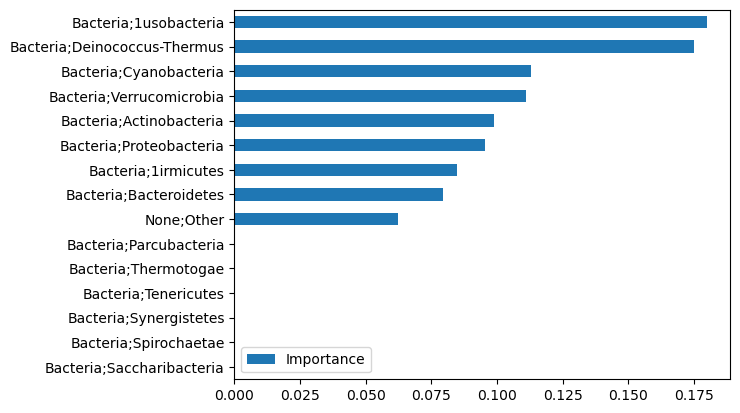

In [105]:
plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [ ]:
for estimator in xgb_scores['estimator']:
    explainerxgb = shap.Explainer(estimator, X)
    shap_valuesxgb = explainerxgb.shap_values(X)

In [107]:
np.shape(shap_valuesxgb)

(91, 25)

In [108]:
shap_valuesxgb_mean = np.mean(shap_valuesxgb, axis=0, keepdims=True)

In [109]:
np.shape(shap_valuesxgb_mean)

(1, 25)

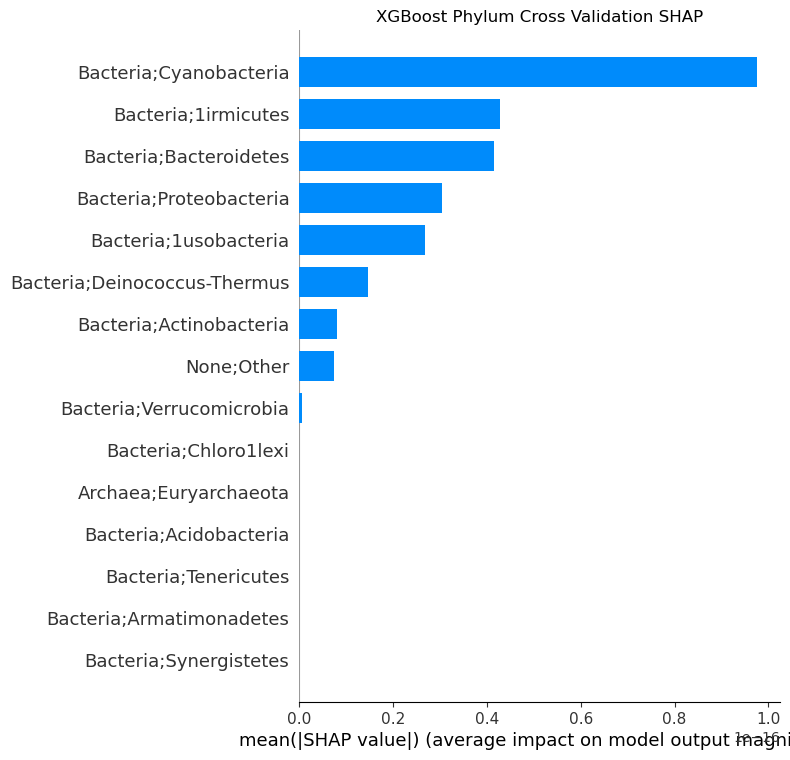

In [110]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('XGBoost Phylum Cross Validation SHAP')
plt.show()

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
loolgbm = LeaveOneOut()
lgbm_scores = cross_validate(clflgbm, X, y, cv=loolgbm, scoring='accuracy', verbose=False, return_estimator=True)

In [112]:
feature_importances_complete_lgb = []

for idx, estimator in enumerate(lgbm_scores['estimator']):
    #print(f'The most important features for estimator {idx}:')
    feature_importances_lgb = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    #print(feature_importances_lgb)
    feature_importances_complete_lgb.append(feature_importances_lgb)

feature_importances_complete_lgb = pd.concat(feature_importances_complete_lgb)

In [113]:
fic_lgb = feature_importances_complete_lgb.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [114]:
fic_lgb[:15]

,Importance
Bacteria;Proteobacteria,68.615385
None;Other,51.978022
Bacteria;Bacteroidetes,41.197802
Bacteria;Cyanobacteria,36.747253
Bacteria;1irmicutes,32.945055
Bacteria;Actinobacteria,30.791209
Bacteria;Nitrospirae,0.000000
Bacteria;Verrucomicrobia,0.000000
Bacteria;Thermotogae,0.000000
Bacteria;Tenericutes,0.000000


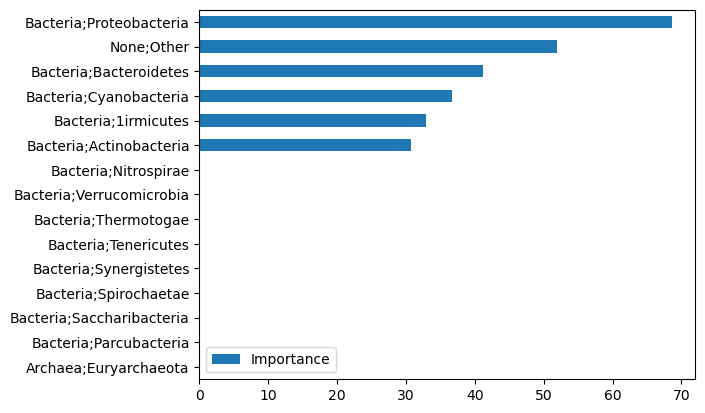

In [115]:
plot_fic_lgb = fic_lgb[:15]
plot_fic_lgb.plot(kind='barh').invert_yaxis()

In [116]:
for estimator in lgbm_scores['estimator']:
    explainerlgb = shap.Explainer(estimator, X)
    shap_valueslgb = explainerlgb.shap_values(X)    
    

In [117]:
np.shape(shap_valueslgb)

(91, 25)

In [118]:
shap_valueslgb_mean = np.mean(shap_valueslgb, axis=0, keepdims=True)

In [119]:
np.shape(shap_valueslgb_mean)

(1, 25)

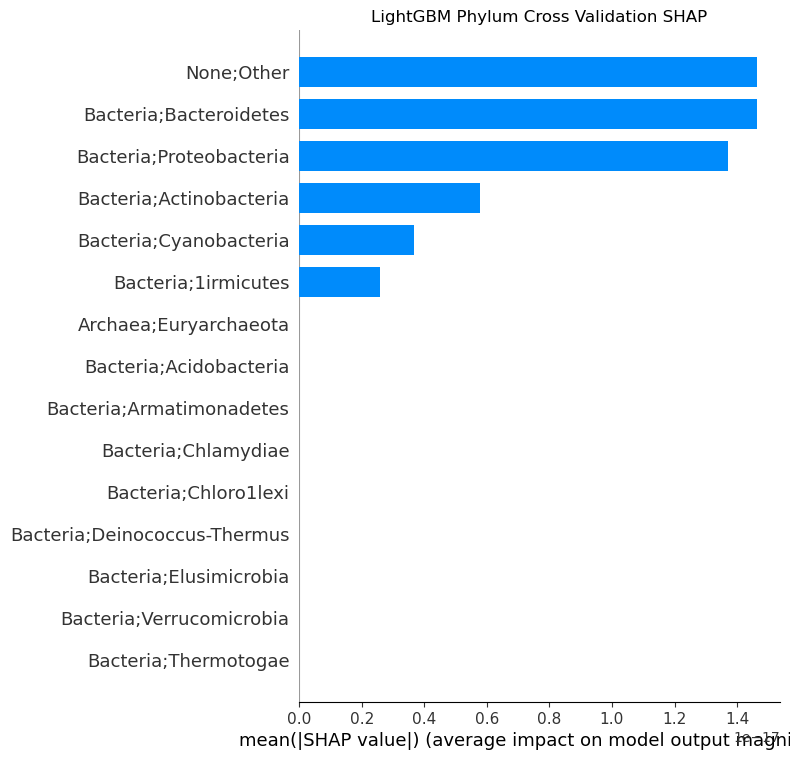

In [120]:
shap.summary_plot(shap_valueslgb_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('LightGBM Phylum Cross Validation SHAP')
plt.show()

### Multilayer perceptron 

In [121]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=30000, verbose=False)
clfmlp.out_activation_="softmax"

loomlp = LeaveOneOut()
mlp_scores = cross_validate(clfmlp, X, y, cv=loomlp, scoring='accuracy', return_estimator=True)

In [122]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.
MLP_feature_importances_complete = []

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpimportance = estimator.fit(X, y)
    result = permutation_importance(mlpimportance,X, y,n_repeats=20, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpimportance.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    #print(f'The most important features for estimator {idx}:')
    #print(MLPfeatures)
    MLP_feature_importances_complete.append(MLPfeatures)

MLP_feature_importances_complete = pd.concat(MLP_feature_importances_complete)

In [123]:
MLPfeatures.shape

(25, 2)

In [124]:
MLP_feature_importances_complete.shape

(2275, 2)

In [125]:
fic_mlp = MLP_feature_importances_complete.groupby('Features').mean().sort_values('Importance', ascending=False)

In [126]:
fic_mlp.shape

(25, 1)

In [127]:
fic_mlp[:15]

,Importance
Features,
Bacteria;Proteobacteria,1.060440e-01
Bacteria;Actinobacteria,9.010989e-02
Bacteria;1irmicutes,5.109890e-02
Bacteria;Cyanobacteria,9.890110e-03
Bacteria;Deinococcus-Thermus,1.098901e-03
Bacteria;Elusimicrobia,1.098901e-03
Bacteria;Bacteroidetes,5.494505e-04
Bacteria;1usobacteria,5.494505e-04
Bacteria;Spirochaetae,5.494505e-04


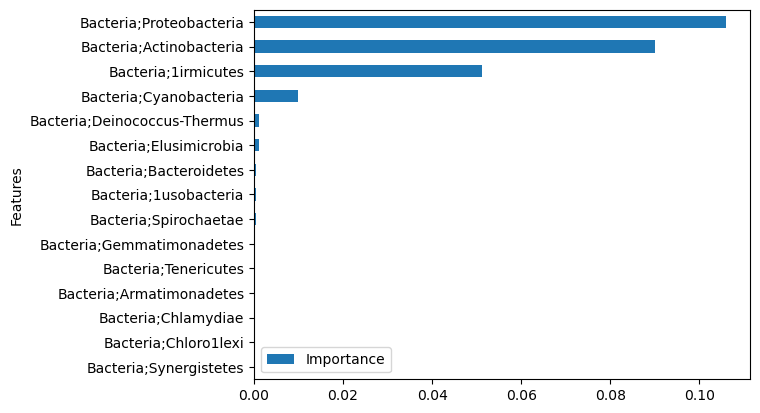

In [128]:
plot_fic_mlp = fic_mlp[:15]
plot_fic_mlp.plot(kind='barh').invert_yaxis()

In [129]:
for estimator in mlp_scores['estimator']:
    explainermlp = shap.Explainer(mlpimportance.predict, X)
    shap_valuesmlp = explainermlp.shap_values(X)

In [130]:
np.shape(shap_valuesmlp)

(91, 25)

In [131]:
shap_valuesmlp_mean = np.mean(shap_valuesmlp, axis=0, keepdims=True)

In [132]:
np.shape(shap_valuesmlp_mean)

(1, 25)

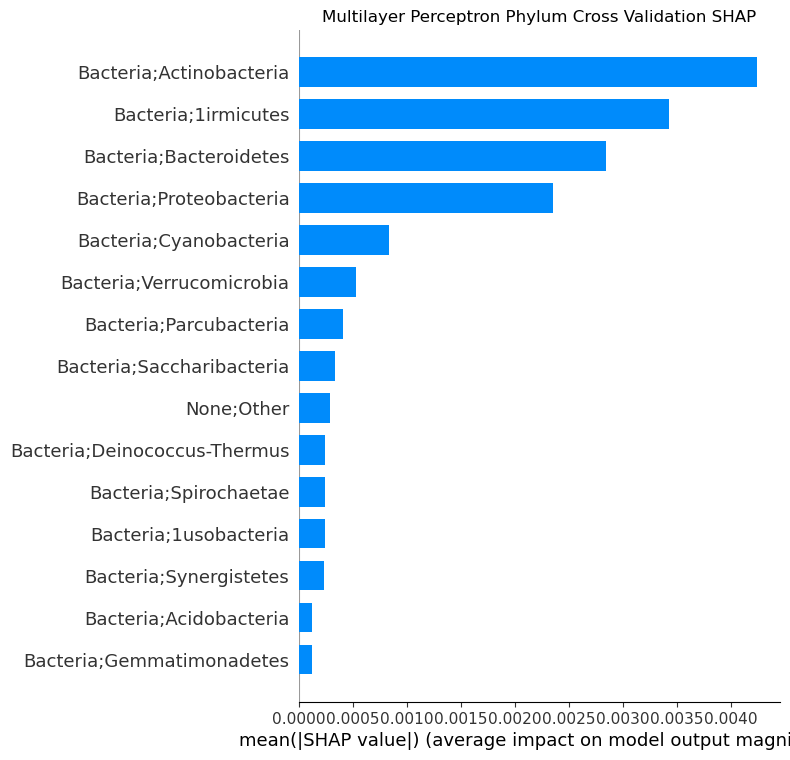

In [133]:
shap.summary_plot(shap_valuesmlp_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('Multilayer Perceptron Phylum Cross Validation SHAP')
plt.show()